In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')

sdh_notes = pd.concat([train, test, val])

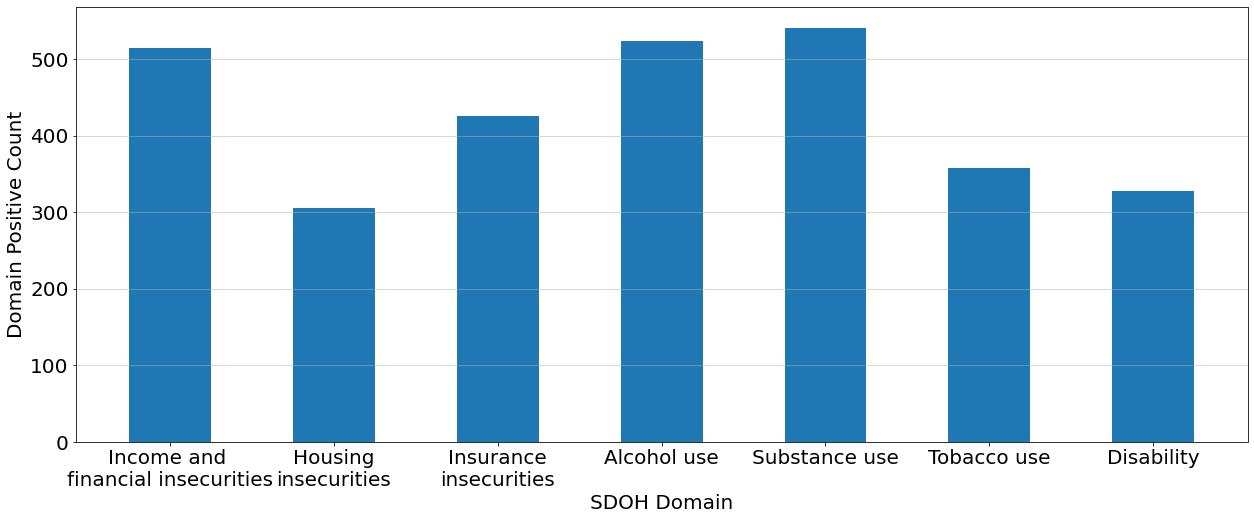

In [29]:
class_names = ['income', 'housing', 'insurance', 'alcohol', 'substance', 'tobacco', 'disability']
domain = ['Income and \nfinancial insecurities',
          'Housing\ninsecurities',
          'Insurance\ninsecurities',
          'Alcohol use',
          'Substance use',
          'Tobacco use',
          'Disability',]
# sdh_notes[class_names].sum(axis=0).plot.bar(x = domain)
fig = plt.figure(figsize =(21, 8))
plt.bar(domain, sdh_notes[class_names].sum(axis=0), align='center', width=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("SDOH Domain",fontsize=20)
plt.ylabel("Domain Positive Count",fontsize=20)
# plt.xticks(rotation=40, ha='right')
plt.grid(axis='y', linewidth=.5)      
plt.savefig('Data Distribution.png')

In [10]:
sdh_notes['num'] = sdh_notes.apply(lambda r: sum([r[c] for c in class_names]), axis=1)

In [12]:
sdh_notes[sdh_notes['num'] > 1]

,NUM,source_id,RESULT_TVAL,income,housing,insurance,alcohol,substance,tobacco,disability,num
9,2887100,0,p/w c/o possible seizure from drug withdrawal ...,0,0,0,1,1,0,0,2
17,16342888,0,severe depression caused by family event. Deni...,0,0,0,1,1,0,0,2
18,12393640,0,53 y/o male current smoker and ETOH use ( 2 sh...,0,0,0,1,0,1,0,2
20,2131240,2,_x000D_\nIndicator: as follows_x000D_\nTreatme...,0,0,0,1,1,0,0,2
27,17845284,0,"Self, Other: PT WAS KICKED OUT OF HIS HALF WAY...",0,1,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
597,7538576,0,6/10:36 yof pmh obesity presents to ED with kn...,0,0,0,1,1,1,0,3
600,9105388,0,pt aao x 4 no distress noted ambulatory withou...,0,1,0,0,1,0,0,2
602,12681194,0,"Migraines, NIDDM, Other: Somatoform pain disor...",0,0,0,1,1,0,0,2
603,6495589,1,since pts diagnosis he has become overwhelmed ...,1,0,0,0,0,0,1,2


In [14]:
sdh_notes['RESULT_TVAL'].apply(len).mean()

256.84325699745546

In [15]:
sdh_notes[sdh_notes['num'] == 0]

,NUM,source_id,RESULT_TVAL,income,housing,insurance,alcohol,substance,tobacco,disability,num
1,8032263,0,"Pt's s/p kidney transplant today, with QTc of ...",0,0,0,0,0,0,0,0
3,17939720,0,assess bm\nadminister colace with meds \ninfor...,0,0,0,0,0,0,0,0
4,13277878,0,Pt ambulatory to triage c/o abd pain x months....,0,0,0,0,0,0,0,0
8,3148858,1,pt requested to leave prior to 1 hour post obs...,0,0,0,0,0,0,0,0
10,17422706,0,Pt c/o blurred vision and bilateral pupil dila...,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
604,6880920,0,# Neurology:\n\n\n\n-CVA\n\n\n\n-MRI with nume...,0,0,0,0,0,0,0,0
607,16917894,0,Patient placed on Green POD/RME for dispositio...,0,0,0,0,0,0,0,0
609,2120130,2,_x000D_\nPerformed By: Pain Service_x000D_\nEp...,0,0,0,0,0,0,0,0
610,16825132,0,"#Fever/Tachycardia: likley drug fever, rheum w...",0,0,0,0,0,0,0,0
